In [2]:
library(tidyverse)
library(readr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Load the datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# View first few rows of players
head(players)

# View structure of players dataset
glimpse(players)

# Summary statistics for players
summary(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

In [5]:
# View first few rows of sessions
head(sessions)

# View structure of sessions dataset
glimpse(sessions)

# Summary statistics for sessions
summary(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## Introduction

This project explores whether player characteristics and gameplay behavior can predict subscription to a game-related newsletter on a Minecraft research server. The ability to forecast which players are most likely to subscribe can help the research team at UBC improve outreach, allocate server resources effectively, and recruit more engaged users.

We will explore the datasets provided and build a classification model to predict newsletter subscription.


In [6]:
# Step 1: Calculate median age (excluding NAs)
median_age <- players %>%
  filter(!is.na(Age)) %>%
  summarize(median_age = median(Age)) %>%
  pull(median_age)

# Step 2: Split data: players with age, players without
players_with_age <- players %>%
  filter(!is.na(Age))

players_missing_age <- players %>%
  filter(is.na(Age)) %>%
  mutate(Age = median_age)
#bgdnbgcfmfcjxt

# Step 3: Combine back together
players <- bind_rows(players_with_age, players_missing_age)

In [7]:
# Create session duration using original timestamp columns
sessions <- sessions %>%
  mutate(session_duration = (original_end_time - original_start_time) / (1000 * 60))

In [8]:
# For each player, count how many sessions they had,
session_summary <- sessions %>%
  group_by(hashedEmail) %>%
  summarize(
    num_sessions = n(),
    total_play_time = sum(session_duration, na.rm = TRUE),
    avg_session_length = mean(session_duration, na.rm = TRUE)
  )

In [9]:
# Join players with session summary
merged_data <- left_join(players, session_summary, by = "hashedEmail")

# Split rows into those with session data and those without
session_data_rows <- merged_data %>%
  filter(!is.na(num_sessions))

no_session_data_rows <- merged_data %>%
  filter(is.na(num_sessions)) %>%
  mutate(
    num_sessions = 0,
    total_play_time = 0,
    avg_session_length = 0
  )

# Combine them back
merged_data <- bind_rows(session_data_rows, no_session_data_rows)
head(merged_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions,total_play_time,avg_session_length
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,2000.0000,74.07407
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,166.6667,55.55556
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.0000,0.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,0.0000,0.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,0.0000,0.00000
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,0.0000,0.00000


## Phase 3: Data Cleaning and Merging

In this phase, we prepared our dataset for analysis by cleaning and combining the two raw data sources: `players.csv` and `sessions.csv`.

We began by handling missing values in the `Age` column of the `players` dataset. Since we have not yet learned conditional replacement functions like `ifelse()` or `case_when()` in DSCI 100, we used filtering and `mutate()` to separate players with and without age data. We then calculated the median age of those with valid entries and assigned it to the missing entries. The two subsets were recombined using `bind_rows()` to form a complete version of the `players` dataset.

Next, we calculated session durations using the `original_start_time` and `original_end_time` columns from the `sessions` dataset. These columns were recorded as numeric timestamps (in milliseconds), so we computed the session duration in minutes by subtracting the two values and dividing by 1000 × 60.

We then created a new summary table grouped by player (`hashedEmail`) that contained three new variables:
- `num_sessions`: the number of recorded sessions per player
- `total_play_time`: the total number of minutes played
- `avg_session_length`: the average duration of a session for each player

Finally, we merged this session summary with the cleaned `players` dataset using `left_join()`. Some players did not have any recorded session data, resulting in missing values for the session-based columns. To address this, we filtered those rows, replaced their missing values with 0 using `mutate()`, and recombined them with the complete-session rows using `bind_rows()`.

The result is a single, clean dataset called `merged_data` that contains demographic and behavioral features for each player. This dataset is now ready for exploratory data analysis in the next phase.


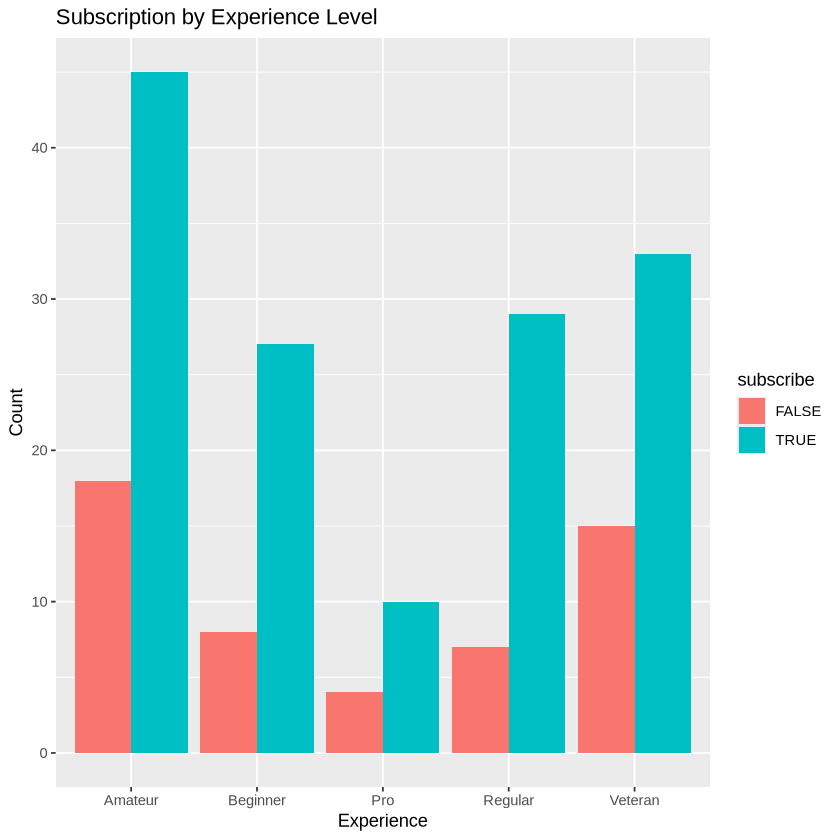

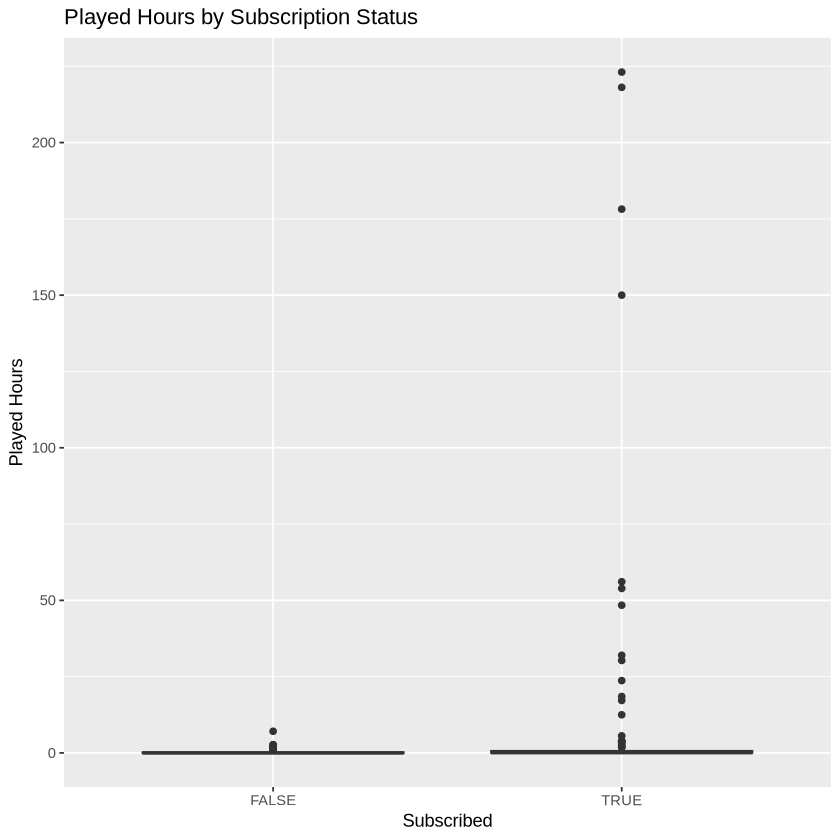

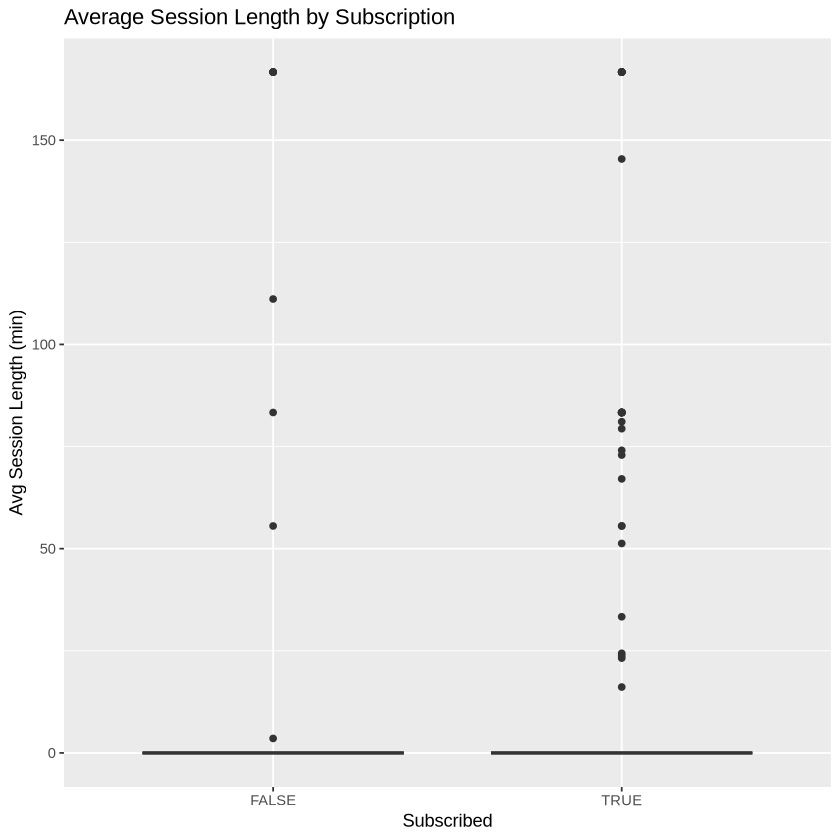

In [10]:
# Bar chart: subscription count by experience level
ggplot(merged_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription by Experience Level", x = "Experience", y = "Count")

# Boxplot: played hours vs subscription
ggplot(merged_data, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Played Hours by Subscription Status", x = "Subscribed", y = "Played Hours")

# Boxplot: average session length vs subscription
ggplot(merged_data, aes(x = subscribe, y = avg_session_length)) +
  geom_boxplot() +
  labs(title = "Average Session Length by Subscription", x = "Subscribed", y = "Avg Session Length (min)")


In [11]:
# Average stats grouped by subscription status
merged_data %>%
  group_by(subscribe) %>%
  summarize(
    avg_played_hours = mean(played_hours),
    avg_num_sessions = mean(num_sessions),
    avg_total_play = mean(total_play_time),
    avg_session_length = mean(avg_session_length),
    avg_age = mean(Age)
  )


subscribe,avg_played_hours,avg_num_sessions,avg_total_play,avg_session_length,avg_age
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.5019231,1.980769,32.05128,20.90153,22.98077
TRUE,7.7756944,9.944444,504.62963,18.88779,19.61111


In this phase ,we explored how player characteristics and behavior relate to newsletter subscription status.

First, we visualized subscription counts by experience level using a bar chart. We also used boxplots to compare `played_hours` and `avg_session_length` between players who subscribed and those who did not. These visualizations help reveal differences in engagement.

Next, we created a summary table to compare the average behavior of subscribed vs. non-subscribed players. Subscribed players tended to have higher average play time, more sessions, and longer average session durations, suggesting that more engaged players are more likely to subscribe.

These findings support the idea that behavioral features could help predict subscription status in later modeling phases.
